In [43]:
import os
import sys

print(os.getcwd())
cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color,bg,fg,hl
vID.init(cwd0)
import tools4pyPhysChem as t4pPC

/home/vfornemo/PytChem/PytChem


**Start at:** Friday 03 November 2023, 00:41:49  
**Hostname:** Winnie-virtual-machine (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

# Molecular representations

<div class="introT" title="What is a molecule?">

A molecule is a group of atoms that are connected through chemical bonds. The number of atoms can range from only a few (e.g., in low molecular weight drugs) to several thousand (e.g., in proteins) or even millions (e.g., in DNA molecules). 

The properties of a molecule emerge in a non-trivial way from the interplay of its constituent atoms. From the viewpoint of physics, molecules are complex three-dimensional objects that are dynamic rather than static and that exhibit quantum mechanical properties. Given the principles of quantum physics, the knowledge of the exact wavefunction $\Psi(\textbf{R},t)$ of a molecule gives access to all its properties.

Depending on the task you want to solve, a simplified view of molecules might be helpful. 

</div>
<br>
<div class="introT" title="Molecular representations for humans">

The easiest way to identify a molecule is its trivial name. For example, aspirin. This is only possible for well-known molecules.

Alternatively, the IUPAC nomenclatures of organic and inorganic chemistry can be used. The goal is that each possible molecule is associated with a name that is easy to understand and that unambiguously identifies the molecule. 

*Example*: The aspirin molecule has the IUPAC name: 2-acetyloxybenzoic acid. It is then possible, from this name, to draw the 2D representation of aspirin. Chemists actually most frequently think about **chemical structure in 2D**, whereas **molecules actually exist in 3D physical space**. 2D representations are designed to mimic the experience of drawing structural formulas on paper. 


<p style="text-align:center;"><img src="./Molecules-data/Aspirin.png" alt="aspirin" width="15%"/></p>

</div>
<br>
<div class="introT" title="Molecular representations in the age of cheminformatics">
    
In order for chemists to rely on insights from cheminformatics, it is important to understand the way in which standard chemical softwares or computer libraries store and analyze chemical structure. Therefore, cheminformatics depends upon the **coding and the use of representations of molecular structures and related data** that are understandable both to human scientists and to machine algorithms, including **machine learning algorithms**.
    
The 3D conformation of a molecule, and the relative position of functional groups is however often of key importance since it determines its properties. Atomic coordinates may be determined experimentally (typically via x-ray crystallography), or calculated (using force-fields, quantum chemistry, molecular dynamics or composite models such as docking)

---

**SMILES** (Simplified Molecular Input Line Entry Specification) is the most widely used text-based representation and can be handled by all common frameworks, so it is probably be a good starting point. SMILES uses a combination of letters, numbers, and symbols to represent the atoms and bonds in a molecule. The letters identify the elements, the symbols specify the connectivity/branching structure. The SMILES coding of aspirin is: `CC(=O)OC1=CC=CC=C1C(=O)O`, where the `C1=CC=CC=C1` is the aromatic ring, whereas `CC(=O)O` and `C(=O)O` stand for the acetyloxy and carboxylic acids functional groups. 

</div>
<br>
<div class="rq">

**<span style="color:red">Prerequisite.</span> Basic knowledge on:**
- chemical databases, such as [PubChem](https://pubchem.ncbi.nlm.nih.gov/) or [ChemSpider](https://www.chemspider.com/)
- the simplified molecular-input line-entry system (SMILES), which is a specification in the form of a line notation for describing the structure of chemical species using short ASCII strings ([wikipedia](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system))

</div>

## 3D representation

<div class="intro">
    
3D modeling software are powerful tools that help many professionals create complex 3D graphics and visualize their work. In the field of chemistry, there is various software for molecular modeling and visualization. We will use in the present notebook the JSmol viewer widget. [JSmol](https://jmol.sourceforge.net/) returns a 3D representation of a molecule that may be used as a teaching tool, or for research e.g., in chemistry and biochemistry. It is a very powerful tool, with a nice GUI, and advanced tools that can be used by using its [rich scripting language](https://chemapps.stolaf.edu/jmol/docs/).

<p style="text-align:center;"><img src="./MiscImages/JMol-JSMol-logos.png" alt="JMol logos" width="200px"></p>

The [vChem3D website](https://vchem3d.univ-tlse3.fr/), made to teach chemistry in 3D, is fully based on JSMol.

</div>

In [44]:
#This is JSmol viewer widget which can be used in Jupyter Notebooks and JupyterLab
from jupyter_jsmol import JsmolView
from ipywidgets import Layout

### The Molfile format

<div class="intro">
MDL Molfile is a file format for holding information about the atoms, bonds, connectivity and coordinates of a molecule.
    
Let's first briefly see on an example how a Molfile looks like. It is the anisole molecule, downloaded from the [PubChem database](https://pubchem.ncbi.nlm.nih.gov/compound/Anisole).
</div>

In [45]:
anisoleMolFile = open("./Molecules-data/anisole.mol", "r")
print(anisoleMolFile.read())
anisoleMolFile.close()

7519
  -OEChem-05112309193D

 16 16  0     0  0  0  0  0  0999 V2000
    1.8925   -0.6211    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.5699   -0.3011   -0.0003 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1759    1.0370   -0.0002 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3918   -1.3114   -0.0001 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1799    1.3647    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7476   -0.9836    0.0001 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1417    0.3545    0.0002 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8227    0.4610    0.0003 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8695    1.8709   -0.0003 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0910   -2.3555    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4879    2.4064    0.0001 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4966   -1.7702    0.0003 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1974    0.6096    0.0003 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.7368    1.0652 

<div class="intro">

JSMol can nicely give an interactive representation of this MDL Molfile coding. 
</div>

In [46]:
JSMol = JsmolView(
    layout=Layout(height="300px", width="300px"), 
    info={'color':'#e2e2e2'}
)

display(JSMol)

JSMol.load_file("./Molecules-data/anisole.mol",inline=True)

JsmolView(layout=Layout(height='300px', width='300px'))

### The xyz format

<div class="intro">
The xyz file format is a simple format that usually gives the number of atoms in the first line, a comment on the second, followed by a number of lines with atomic symbols (or atomic numbers) and cartesian coordinates. There is no information about connectivity, so that graphical softwares that depict chemical structures in 3-dimensions only show the skeleton of a coumpound
</div>

In [47]:
anisolexyzFile = open("./Molecules-data/anisole.xyz", "r")
print(anisolexyzFile.read())
anisolexyzFile.close()

16
Saved after anisole.mol downloaded from PubChem
O       1.89250     -0.62110      0.00000
C       0.56990     -0.30110     -0.00030
C       0.17590      1.03700     -0.00020
C      -0.39180     -1.31140     -0.00010
C      -1.17990      1.36470      0.00000
C      -1.74760     -0.98360      0.00010
C      -2.14170      0.35450      0.00020
C       2.82270      0.46100      0.00030
H       0.86950      1.87090     -0.00030
H      -0.09100     -2.35550      0.00000
H      -1.48790      2.40640      0.00010
H      -2.49660     -1.77020      0.00030
H      -3.19740      0.60960      0.00030
H       2.73680      1.06520      0.90980
H       2.73730      1.06530     -0.90920
H       3.82670      0.02410      0.00050



In [48]:
JSMol = JsmolView(
    layout=Layout(height="300px", width="300px"), 
    info={'color':'#e2e2e2'}
)

display(JSMol)

JSMol.load_file("./Molecules-data/anisole.xyz",inline=True)

JsmolView(layout=Layout(height='300px', width='300px'))

### The cif format

<div class="intro">

Crystallographic Information File (CIF) is a standard text file format for representing crystallographic information, promulgated by the International Union of Crystallography (IUCr). Cristallographic data can be downloaded at CCDC, the free access being restricted to a [basic search interface](https://www.ccdc.cam.ac.uk/structures/?) - you primarily have to know the DOI of the article where the X-ray data were published. The totally free [Crystallography Open Database](http://www.crystallography.net/cod/search.html) also contains a lot of structures.
</div>

In [49]:
anisolexyzFile = open("./Molecules-data/1158630.cif", "r")
print(anisolexyzFile.read())
anisolexyzFile.close()

####################################################################### 
# 
# This file contains crystal structure data downloaded from the 
# Cambridge Structural Database (CSD) hosted by the Cambridge 
# Crystallographic Data Centre (CCDC).
# 
# Full information about CCDC data access policies and citation 
# guidelines are available at http://www.ccdc.cam.ac.uk/access/V1 
# 
# Audit and citation data items may have been added by the CCDC. 
# Please retain this information to preserve the provenance of 
# this file and to allow appropriate attribution of the data. 
# 
#######################################################################

data_FOJBOV03
#This CIF has been generated from an entry in the Cambridge Structural Database
_database_code_depnum_ccdc_archive 'CCDC 1158630'
_database_code_CSD               FOJBOV03
loop_
_citation_id
_citation_doi
_citation_year
1 10.1021/om00028a082 1993
_audit_creation_method           'Created from the CSD'
_audit_update_record             

In [50]:
JSMol = JsmolView(
    layout=Layout(height="300px", width="600px"), 
    info={'color':'#e2e2e2'}
)

display(JSMol)

JSMol.load_file("./Molecules-data/1158630.cif",inline=True)
JSMol.script('moveto 1.0 { -992 -89 -87 80.42} 160.0 -3.83 -0.67 {4.135600159243033 2.504950284603811 4.381773503715626} 9.52466520069848 {0 0 0} 0 0 0 3.0 0.0 0.0;')

JsmolView(layout=Layout(height='300px', width='600px'))

## RDKit, a toolkit for cheminformatics

<div class="intro">
    
```RDKit``` is a collection of cheminformatics and machine-learning software written in C++ and Python. It is designed to assist in the analysis and design of small molecules and chemical compounds. It provides a set of libraries and tools for the manipulation or analysis of:
- Molecular visualization
- Molecular fingerprints & descriptors
- Substructure searching
- Chemical reactions
- Enhanced stereochemistry
- Molecular standardization
- Conformation generation
- UFF and MMFF94/MMFF94S force fields, very useful for cleaning up molecular structures
- Shape-based similarity
- Molecule-molecule alignment
    
It reads and writes a lot of formats, including MDL Molfiles and SMILES.

`RDKit` is widely used in academia, as well as in the pharmaceutical, biotech, and chemical industries for a variety of tasks such as virtual screening, lead optimization, and chemical database management. Regular updates are released at 6 months intervals.

It has a very good integration with Jupyter and pandas.The easiest way to install it is to run the command:
```bash
pip install rdkit
```

  
There are nice online documentations:
- you can first start with the [Getting Started with the RDKit in Python document](https://www.rdkit.org/docs/GettingStartedInPython.html)
- an [RDKit cookbook](https://www.rdkit.org/docs/Cookbook.html) provides example recipes of how to carry out particular tasks using the RDKit functionality from Python

The present Jupyter notebook is inspired from these two documents and from the [RDKit basics notebook of EPFL](https://github.com/schwallergroup/ai4chem_course/blob/main/notebooks/01%20-%20Basics/01d_rdkit_basics_demo.ipynb).

</div>

<div class="intro">
    
Let's first start importing relevant modules. The majority of the basic molecular functionality is found in module [rdkit.Chem](https://www.rdkit.org/docs/source/rdkit.Chem.html#module-rdkit.Chem)

</div>

In [51]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from rdkit import Chem
from rdkit.Chem import Draw, AllChem

#cancel the "last operation show-up" specific of Jupyter notebooks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### SMILES format

<div class="intro">
    
SMILES refers to a line notation for encoding molecular structures, using chemical symbols, and specifying bonds, rings, branching, aromaticity and even stereochemistry or isotopes. ```CC```, ```C=C```, ```C#C``` stand for ethane, ethene and ethyne, respectively. Typically, a number of equally valid SMILES strings can be written for a molecule. For example, ```CCO```, ```OCC``` and ```C(O)C``` all specify the structure of ethanol.

</div>

#### Creating molecules

<div class="intro">

The methoxybenzene molecule, also known as anisole, a colorless liquid with a smell reminiscent of anise seed, will be used in the first part of this notebook. Ring structures are written by breaking each ring at an **arbitrary point**, and adding numerical ring closure labels to show connectivity between non-adjacent atoms. For example, cyclohexane may be written as ```C1CCCCC1```. 

One possible SMILES description for anisole is: ```C1=CC(OC)=CC=C1```. Let's check that and let's also see the difference with ```C1=CC(CO)=CC=C1```: 
    
</div>

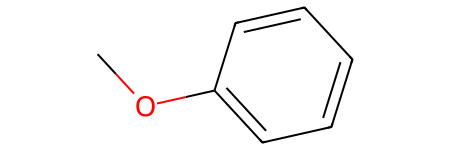

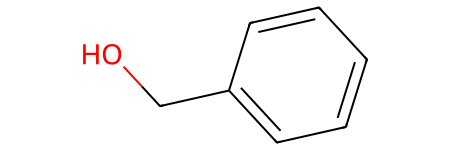

In [52]:
Chem.MolFromSmiles('C1=C(OC)C=CC=C1')
Chem.MolFromSmiles('C1=C(CO)C=CC=C1')

<div class="intro">

A ```Mol``` ```RDKit``` object has actually been created by calling ```Chem.MolFromSmiles```. It can be stored into a variable representing anisole. It seems quite convenient to call it ```anisole```. The value of this variable can be displayed in the notebook by typing its name and then running the cell. 
    
</div>

rdkit.Chem.rdchem.Mol

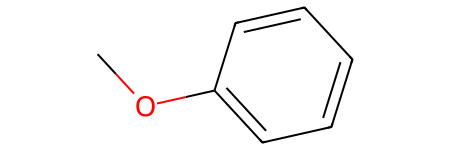

In [53]:
anisole = Chem.MolFromSmiles('C1=C(OC)C=CC=C1')
type(anisole)
anisole

<div class="rqE">
    
The 3D mol format has nothing to do with the ```Mol``` type of RDKit objects
    
</div>

<div class="exE">

Define a `Mol RDKit` object that will contain the vitamin C molecule
</div>

rdkit.Chem.rdchem.Mol

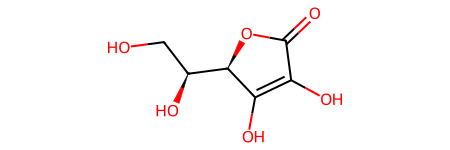

In [54]:
VC = Chem.MolFromSmiles('OC[C@H](O)[C@@H]1C(O)=C(O)C(=O)O1')
type(VC)
VC


<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below

</div>

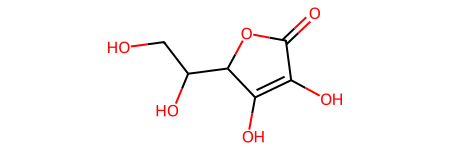

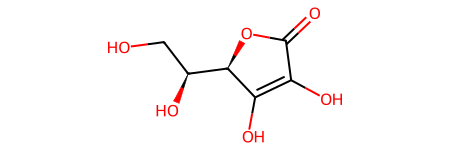

In [55]:
# %load ./SolutionsToExercises/ML/ascorbic.py

# the SMILES and isomeric SMILES code were copied from the PubChem website
ascorbic = Chem.MolFromSmiles('C(C(C1C(=C(C(=O)O1)O)O)O)O')
ascorbic
ascorbicIso = Chem.MolFromSmiles('C([C@@H]([C@@H]1C(=C(C(=O)O1)O)O)O)O')
ascorbicIso

#### Canonicalization

<div class="intro">
    
Different SMILES can represent the same molecule. This is a big problem in the context of cheminformatics, where you want unambiguous and unique compound descriptors. To do this, we can apply a canonicalization process. This concept refers to the generation of a unique SMILES for each molecule. We can use the ```MolToSmiles``` function in ```RDKit``` to get the SMILES of a ```Mol``` object. By default, ```RDKit``` canonicalizes the SMILES when applying this function.
    
</div>
<br>
<div class="rqE">
    
`MolToSmiles` returns a string 
    
</div>

str

'COc1ccccc1'

rdkit.Chem.rdchem.Mol

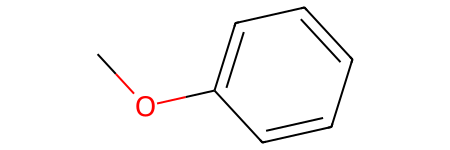

In [56]:
anisoleCan=Chem.MolToSmiles(anisole)
type(anisoleCan)
anisoleCan #is a string at this step 
anisoleCan = Chem.MolFromSmiles(anisoleCan)
type(anisoleCan) # it is now an RDKit Mol object
anisoleCan #plot in 2D

<div class="rqE">
    
**There is no standard canonicalization**. The resulting SMILES will depend on the cheminformatics toolkit and the version that is used. If you want to perform a comparison/similarity/machine learning study using SMILES, you must first apply the same canonicalization process to ALL the molecules of interest.
    
</div>

#### Conversion from MDL Molfile to SMILES

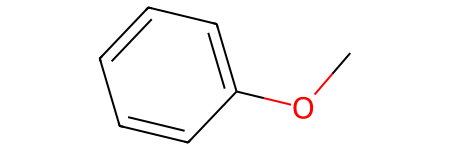

rdkit.Chem.rdchem.Mol

In [57]:
# reading of a mol file 
anisole = Chem.MolFromMolFile('./Molecules-data/anisole.mol')
anisole
# again, the Mol type of anisole has nothing to do with the MDL molfile format
type(anisole)

<div class="intro">
    
Single molecules can be converted to text using several functions present in the ```rdkit.Chem``` module
    
</div>

In [58]:
Chem.MolToSmiles(anisole)

'COc1ccccc1'

<div class="intro">
    
If you’d like to have the Kekule form of the SMILES, first Kekulize the molecule, then use the “kekuleSmiles” option    
</div>

'COC1=CC=CC=C1'

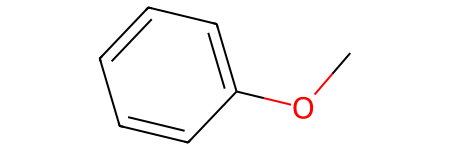

In [59]:
Chem.Kekulize(anisole)
Chem.MolToSmiles(anisole,kekuleSmiles=True)
# It changes nothing to the 2D drawing
anisole

#### Conversion from SMILES to MDL Mol format 

<div class="intro">

MDL Mol blocks are also available, but hydrogen atoms are not infered in the first place, it's only the skeleton that is expanded into a 3D space. Let's see that for cyclobutane:
</div>

In [60]:
cyclobutane = Chem.MolFromSmiles('C1CCC1')
print(Chem.MolToMolBlock(cyclobutane))


     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



<div class="intro">

To visualize it with the JSMol viewer widget and its ```load_str``` tool, this MolFile format must be converted as a string
</div>

In [61]:
JSMol = JsmolView(
    layout=Layout(height="300px", width="300px"), 
    info={'color':'#e2e2e2'}
)
display(JSMol)
JSMol.load_str(str(Chem.MolToMolBlock(cyclobutane)))

JsmolView(layout=Layout(height='300px', width='300px'))

<div class="intro">

Now, add hydrogen atoms
</div>


     RDKit          2D

 12 12  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1213    1.0607    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.1213   -1.0607    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.0607   -2.1213    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607   -2.1213    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1213   -1.0607    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1213    1.0607    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    2.1213    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.0607    2.1213    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
  1  5  1  0
  1  6  1  0
  2  7  1  0
  2 

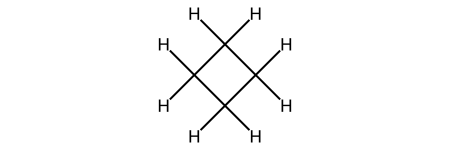

In [62]:
cyclobutaneH = Chem.AddHs(cyclobutane)
print(Chem.MolToMolBlock(cyclobutaneH))
cyclobutaneH

In [63]:
JSMol = JsmolView(
    layout=Layout(height="300px", width="300px"), 
    info={'color':'#e2e2e2'}
)
display(JSMol)
JSMol.load_str(str(Chem.MolToMolBlock(cyclobutaneH)))

JsmolView(layout=Layout(height='300px', width='300px'))

<div class="rq">
    
Cyclobutane is planar! It must be cleaned.
    
</div>

<div class="intro">

Cleaning of the structure, using the so-called ETKDG method. **This is not a geometry optimization based on the minimzation of the energy of the molecule!**
</div>

0


     RDKit          3D

 12 12  0  0  0  0  0  0  0  0999 V2000
   -0.9114   -0.5250   -0.1239 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2240   -0.5610    0.8810 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0216    0.2730   -0.1291 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3416    0.8025   -0.5943 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7624   -1.2743   -0.9473 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9188   -0.5023    0.2807 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.6410   -1.5382    1.1087 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0634    0.0602    1.7653 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.4721   -0.3620   -0.9023 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.6713    1.0223    0.3311 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5985    1.6745    0.0102 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4339    0.9302   -1.6802 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
  1  5  1  0
  1  6  1  0
  2  7  1  0
  2 

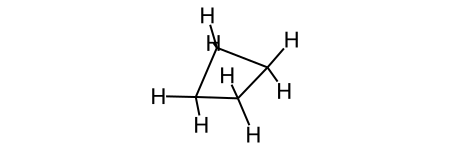

In [64]:
AllChem.EmbedMolecule(cyclobutaneH)
print(Chem.MolToMolBlock(cyclobutaneH))
cyclobutaneH

In [65]:
JSMol = JsmolView(
    layout=Layout(height="300px", width="300px"), 
    info={'color':'#e2e2e2'}
)
display(JSMol)
JSMol.load_str(str(Chem.MolToMolBlock(cyclobutaneH)))

JsmolView(layout=Layout(height='300px', width='300px'))

<div class="rq">
    
That's much better. In summary, it is possible, starting from a 2D SMILES coding, to end-up with a plausible 3D structure candidate.
    
</div>

<div class="exE">

Do the same to propose a possible 3D geometry for vitamin C. Print the mol3D coding and display it with JSMol
</div>

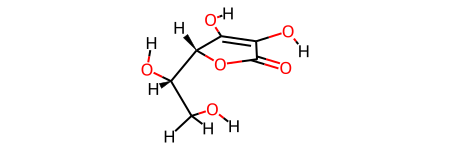

0

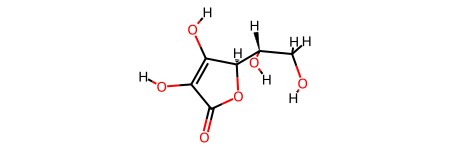


     RDKit          3D

 20 20  0  0  0  0  0  0  0  0999 V2000
    2.8322   -0.7040   -0.2852 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.3702    0.5776   -0.2135 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.9509    0.7114    0.2540 C   0  0  2  0  0  0  0  0  0  0  0  0
    0.7160    0.2083    1.5077 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0443    0.1230   -0.7182 C   0  0  2  0  0  0  0  0  0  0  0  0
   -1.3928    0.3881   -0.1662 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9672    1.6435    0.1098 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0273   -0.7450    0.0485 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.3149   -0.8479    0.5629 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1495   -1.8169   -0.3430 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4537   -3.0574   -0.2650 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.0300   -1.2679   -0.7979 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.4242   -1.3464    0.3121 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.0057    1.1372    0

JsmolView(layout=Layout(height='300px', width='300px'))

In [88]:
VC = Chem.AddHs(VC)
VC

AllChem.EmbedMolecule(VC)
VC

print(Chem.MolToMolBlock(VC))

JSMol = JsmolView(
    layout=Layout(height="300px", width="300px"), 
    info={'color':'#e2e2e2'}
)
display(JSMol)
JSMol.load_str(str(Chem.MolToMolBlock(VC)))


<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below

</div>

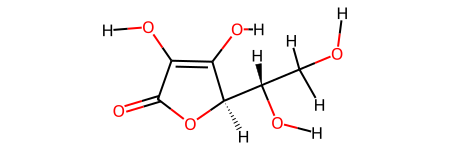

0

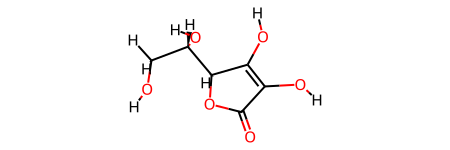


     RDKit          3D

 20 20  0  0  0  0  0  0  0  0999 V2000
   -2.3489    0.3718    0.2041 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9262    0.9101    0.0849 C   0  0  1  0  0  0  0  0  0  0  0  0
    0.0035   -0.1960    0.5333 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.4133    0.2083    0.5203 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0875   -0.6436   -0.2211 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1692   -1.6465   -0.7329 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5138   -2.6150   -1.4868 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0746   -1.3328   -0.2499 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.4784   -0.5678   -0.4611 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.0142    1.3012    1.1623 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6227    1.2802   -1.1992 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5155   -0.7507   -0.6115 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0718    1.1722   -0.0541 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5381    0.0417    1

JsmolView(layout=Layout(height='300px', width='300px'))

In [86]:
# %load ./SolutionsToExercises/ML/ascorbic3D.py

# add explicit H atoms
ascorbicIsoH = Chem.AddHs(ascorbicIso)
ascorbicIsoH

# ETKDG method applied to clean the molecule
AllChem.EmbedMolecule(ascorbicIsoH)
ascorbicIsoH

# print the mol3D code
print(Chem.MolToMolBlock(ascorbicIsoH))

# visualize the 3D representation of vitamin C with JSMol
JSMol = JsmolView(
    layout=Layout(height="300px", width="300px"), 
    info={'color':'#e2e2e2'}
)
display(JSMol)
JSMol.load_str(str(Chem.MolToMolBlock(ascorbicIsoH)))

### Playing with an RDKit Mol Object

<div class="intro">

An  `RDKit Mol` object is actually a graph representing the molecule. In this graph, vertices represents the atoms and edges the bonds in the molecule. Therefore, atoms and bonds can be retrieved from this object

</div>

In [68]:
#Get total number of atoms
n_atoms = anisoleCan.GetNumAtoms()
print(f'Number of atoms: {n_atoms}')
#Get total number of sigma bonds, i.e. the sigma skeleton of the molecule
n_bonds = anisoleCan.GetNumBonds()
print(f'Number of bonds: {n_bonds}')
print()

#create a list containing the atoms of the molecule
atoms = list(anisoleCan.GetAtoms())
#print the atomic number, atomicsymbol and hybridization for each atom in the molecule
for i,atom in enumerate(atoms):
    print(f"Atom {i:3}: {atom.GetAtomicNum():3} {atom.GetSymbol():>2} {atom.GetHybridization()}")

Number of atoms: 8
Number of bonds: 8

Atom   0:   6  C SP3
Atom   1:   8  O SP2
Atom   2:   6  C SP2
Atom   3:   6  C SP2
Atom   4:   6  C SP2
Atom   5:   6  C SP2
Atom   6:   6  C SP2
Atom   7:   6  C SP2


In [69]:
#create a list containing the bonds in the molecule
bonds = list(anisoleCan.GetBonds())
for i,bond in enumerate(bonds):
    print(f"Bond {i:3}: {bond.GetBeginAtomIdx():3}({bond.GetBeginAtom().GetSymbol():>2})-{bond.GetEndAtomIdx()}({bond.GetEndAtom().GetSymbol():>2}), {bond.GetBondType()} ")

Bond   0:   0( C)-1( O), SINGLE 
Bond   1:   1( O)-2( C), SINGLE 
Bond   2:   2( C)-3( C), AROMATIC 
Bond   3:   3( C)-4( C), AROMATIC 
Bond   4:   4( C)-5( C), AROMATIC 
Bond   5:   5( C)-6( C), AROMATIC 
Bond   6:   6( C)-7( C), AROMATIC 
Bond   7:   7( C)-2( C), AROMATIC 


### Substructure search and highlight

<div class="intro">

Atoms in a molecule can be highlighted by drawing a coloured solid or open circle around them, and bonds likewise can have a coloured outline applied. An obvious use is to show atoms and bonds that have matched a substructure query. The process in RDKit is based on [SMILES arbitrary target specification (SMARTS)](https://en.wikipedia.org/wiki/SMILES_arbitrary_target_specification), a language for describing molecular pattern.
    
Substructure searching, the process of finding a particular pattern (subgraph) in a molecule (graph), is one of the most important tasks for computers in chemistry. It is used in virtually every application that employs a digital representation of a molecule, including depiction (to highlight a particular functional group), drug design (searching a database for similar structures and activity), analytical chemistry (looking for previously-characterized structures and comparing their data to that of an unknown), and a host of other problems.

SMARTS is a language that allows you to specify substructures using rules that are straightforward extensions of SMILES. For example, to search a database for phenol-containing structures, one would use the SMARTS string [OH]c1ccccc1 ([introduction copied from daylight.com](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html))

</div>

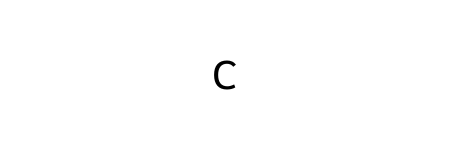

True

((2,), (3,), (4,), (5,), (6,), (7,))


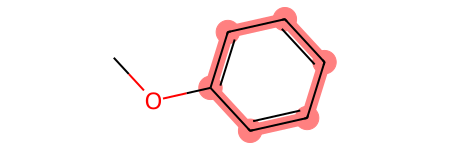

In [70]:
substructure = Chem.MolFromSmarts('c') #aromatic carbons
substructure
anisoleCan.HasSubstructMatch(substructure)
m = anisoleCan.GetSubstructMatches(substructure)
print(m)
anisoleCan

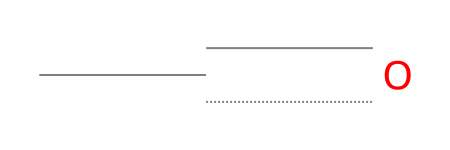

True

((0, 1),)


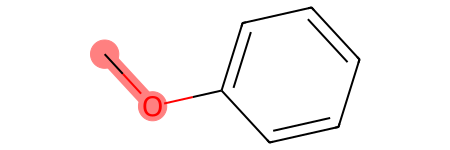

In [89]:
substructure = Chem.MolFromSmarts('CO')  #CO, where is C is not aromatic
substructure
anisoleCan.HasSubstructMatch(substructure)
m = anisoleCan.GetSubstructMatches(substructure)
print(m)
anisoleCan

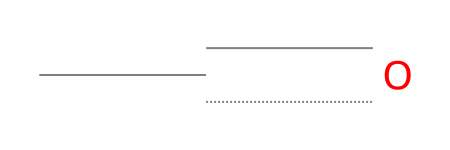

True

((2, 1),)


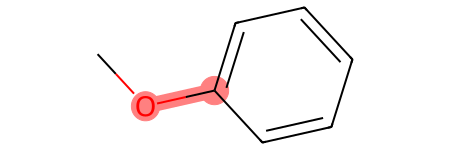

In [72]:
substructure = Chem.MolFromSmarts('cO')  #CO, where is C is aromatic
substructure
anisoleCan.HasSubstructMatch(substructure)
m = anisoleCan.GetSubstructMatches(substructure)
print(m)
anisoleCan

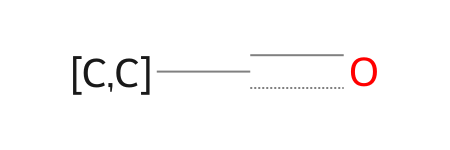

True

((0, 1), (2, 1))


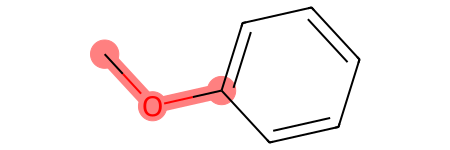

In [73]:
substructure = Chem.MolFromSmarts('[C,c]O')  #CO, where is C is aromatic or not
substructure
anisoleCan.HasSubstructMatch(substructure)
m = anisoleCan.GetSubstructMatches(substructure)
print(m)
anisoleCan

### Fingerprints


<div class="intro">

ML algorithms usually take vectors as inputs and operate with them. 3D or 2D descriptors must be put into a vector form, without loosing their meaning. It is the case with molecules. How can we transform them into numbers to feed our ML algorithms?

One common option is using molecular fingerprints. We will use here the so-called Morgan Fingerprint, that describes molecules as bit arrays (arrays of 1s and 0s).
    
The bits correspond to the circular environments of each atom in a molecule. The number of neighboring bonds and atoms to consider is set by the radius
    
</div>

In [74]:
anisoleFp = AllChem.GetMorganFingerprintAsBitVect(anisoleCan, radius=2, nBits=2048) #nBits is the number of bits (length) of the fingerprint

print(anisoleFp.GetNumBits()) #print vector length

anisoleFPL = anisoleFp.ToList() #visualize vector as list.
print(anisoleFPL)

2048
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0

<div class="rq">
    
A Morgan fingerprint is sparse. Let's illustrate this visually.
    
</div>

<Figure size 1000x100 with 0 Axes>

Text(0.5, 0, 'bit index')

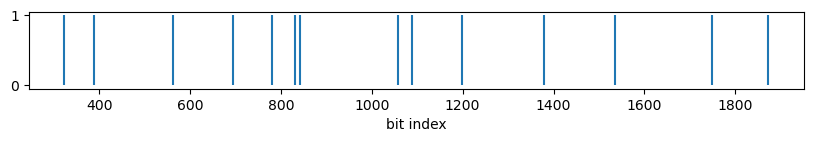

In [ ]:
plt.figure(figsize=(10,1))
plt.vlines(
    [i for i, fp in enumerate(anisoleFPL) if fp > 0.5], ymin=0, ymax=1
)
plt.xlabel("bit index")
plt.show()

<div class="rq">
    
The canonicalized SMILES of anisole is now available as a 1D vector fingerprint, that can be used as an input vector in an ML framework.
    
</div>

<div class="exE">

Visualize the 2048-bits Morgan fingerprint of the canonicalized vitamin C (radius = 2Å)
</div>

2048


<Figure size 1000x100 with 0 Axes>

Text(0.5, 0, 'bit index')

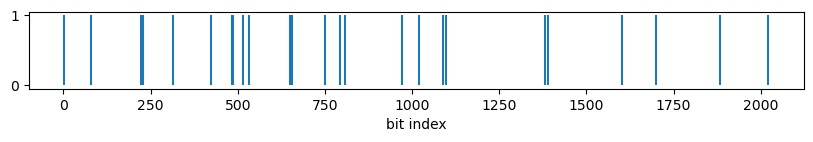

In [93]:
VCCan=Chem.MolToSmiles(ascorbic)
VCCan = Chem.MolFromSmiles(VCCan)

VCFp = AllChem.GetMorganFingerprintAsBitVect(VCCan, radius=2, nBits=2048) #nBits is the number of bits (length) of the fingerprint
print(VCFp.GetNumBits()) #print vector length

VCFPL = VCFp.ToList() #visualize vector as list.

plt.figure(figsize=(10,1))
plt.vlines(
    [i for i, fp in enumerate(VCFPL) if fp > 0.5], ymin=0, ymax=1
)
plt.xlabel("bit index")
plt.show()

<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below

</div>

<Figure size 1000x100 with 0 Axes>

Text(0.5, 0, 'bit index')

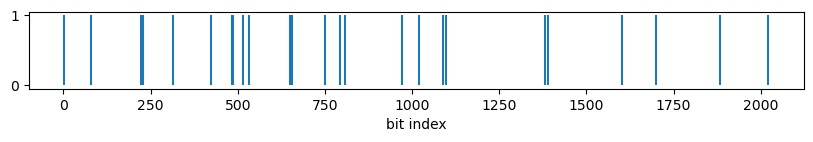

In [92]:
# %load ./SolutionsToExercises/ML/ascorbicMFP.py

ascorbicCan = Chem.MolToSmiles(ascorbic) #it is a string at this step
ascorbicCan = Chem.MolFromSmiles(ascorbicCan) #converts the string as an RDKit mol object
ascorbicFP = AllChem.GetMorganFingerprintAsBitVect(ascorbicCan, radius=2, nBits=2048)
ascorbicFPL = ascorbicFP.ToList()

plt.figure(figsize=(10,1))
plt.vlines(
    [i for i, fp in enumerate(ascorbicFPL) if fp > 0.5], ymin=0, ymax=1
)
plt.xlabel("bit index")
plt.show()

### Reading and using molecular databases with SMILES encoding, using pandas

<div class="intro">

*En route* toward data science and machine learning, thanks to the coupling between ```RDKit``` and ```pandas```! We will use a csv file that contains organic molecules and several data, mainly obtained from quantum chemistry calculations (DFT/B3LYP/6-31G(2df,p)). It is a small selection of the [GDB-9 134k molecules database](https://datarepository.wolframcloud.com/resources/GDB9-Database/), aiming at benchmarking existing methods, developing new methods, such as hybrid quantum mechanics/machine learning, and systematic identifying structure-property relationships ([doi: 10.1038/sdata.2014.22](https://www.nature.com/articles/sdata201422)).
    
Importing ```pandasTools``` enables several features that allow for using RDKit molecules as columns of a Pandas dataframe
</div>

In [95]:
from rdkit.Chem import PandasTools

#### Read the database

In [103]:
df = pd.read_csv('./Molecules-data/dsgdb9-299xtr.csv',sep="\t")
display(df)
df.count()
display(df.describe().style.format("{0:.2f}"))

,version https://git-lfs.github.com/spec/v1
0,oid sha256:1d8b5a05d52c285c5008f2ca65212f2db27...
1,size 101543


version https://git-lfs.github.com/spec/v1    2
dtype: int64

ValueError: Unknown format code 'f' for object of type 'str'

#### Create new columns with RDKit objects or properties

<div class="intro">

A new column can be created holding the respective RDKit molecule objects. Fingerprints can be included to accelerate substructure searches on the dataframe. The 'SMILES BASIC' data in the df dataframe will be converted into  ```mol``` objects that can be processed by RDKit. You can do this using the ```PandasTools.AddMoleculeColumnToFrame``` function.
    
But we will first apply the same canonicalization operation to all the examples we have in the dataframe, using the aptly named ```apply()``` function.
</div>

In [ ]:
def canonicalize_smiles(smiles):
    '''This function takes a non-canonical SMILES and returns the canonical version
    
    Args: 
        -smiles: str, non-canonical SMILES of a molecule
    
    Out:
        - canonical_smiles: str, canonical SMILES of the molecule
    '''
    
    mol = Chem.MolFromSmiles(smiles) #create a mol object from input smiles.
    can = Chem.MolToSmiles(mol) #convert the previous mol object to SMILES. By default, RDKit canonicalizes the SMILES when applying this MolToSmiles() function

    return can

df['CANONICAL SMILES BASIC'] = df['SMILES BASIC'].apply(canonicalize_smiles)
display(df)

KeyError: 'SMILES BASIC'

In [ ]:
df2=df.copy()
PandasTools.AddMoleculeColumnToFrame(df2, smilesCol='SMILES BASIC',includeFingerprints=True,molCol='Molecule') #inserted as the last column
df2.insert(1, 'Molecule', df2.pop('Molecule')) #move after column 1
display(df2)

<div class="intro">

We will now use the `apply()` function of Pandas to compute the molecular weight of all our molecules. This function takes a `mol` object as input and returns its molecular weight.
</div>

In [ ]:
from rdkit.Chem.Descriptors import MolWt
df2['MW'] = df2['Molecule'].apply(MolWt)
df2.insert(4, 'MW', df2.pop('MW')) #move after column 4
display(df2)

<div class="intro">

Let's add other descriptors, such as the number of hydrogen bond donor (`HBD`) and acceptors (`HBA`) in a molecule.
</div>

In [ ]:
from rdkit.Chem.rdMolDescriptors import CalcNumHBA, CalcNumHBD
df2['HBA'] = df2['Molecule'].apply(Chem.AddHs)
df2['HBD'] = df2['Molecule'].apply(Chem.AddHs)
df2['HBA'] = df2['HBA'].apply(CalcNumHBA)
df2['HBD'] = df2['HBD'].apply(CalcNumHBD)
df2.insert(5, 'HBA', df2.pop('HBA')) #move after column 5
df2.insert(6, 'HBD', df2.pop('HBD')) #move after column 6
display(df2)

#### Visualize the molecules in a grid, together with some properties

In [ ]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.bondLineWidth=2
#FrameToGridImage: Draw grid image of mols in pandas DataFrame
PandasTools.FrameToGridImage(df2, molsPerRow=3, column='Molecule',legends=[
        f"{molecule['dsgdb9 ID']}: {molecule['MW']:.2f} Da. HB {molecule['HBD']}D:{molecule['HBA']}A"
        for index, molecule in df2.iterrows()],
        useSVG=True, subImgSize=(400, 200), maxMols=df2.shape[0])

#### Select molecules that match a pattern and visualize them on a grid 

<div class="intro">

The substructure will be given as a SMARTS ([see examples on the Daylight website](https://www.daylight.com/dayhtml_tutorials/languages/smarts/smarts_examples.html))

We will search for ketones. A carbonyl group can be simply identified by `[CX3]=[OX1]` (a carbon that has exactly three connections is double bonded to an oxygen atom that has a single connection). But it hits  carboxylic acid, ester, ketone, aldehyde, carbonic acid/ester,anhydride, carbamic acid/ester, acyl halide, amide.

This is why the SMARTS for ketones is `[#6][CX3](=O)[#6]`
- [CX3] = C with exactly 3 connections
- [#6] carbon atom
- (=O) oxygen involved in a double bond

</div>

In [ ]:
substructure = Chem.MolFromSmarts('[#6][CX3](=O)[#6]') #N-containing compounds
df2['ketone'] = df2['Molecule'].apply(lambda x: x.HasSubstructMatch(substructure))
df2.insert(2, 'ketone', df2.pop('ketone')) #move after column 2
df2

In [ ]:
print(f"There are {df2.loc[df2['ketone']].shape[0]} molecules containing at least one ketone group")

PandasTools.FrameToGridImage(df2.loc[df2['ketone']], molsPerRow=3, column='Molecule',legends=[
        f"{molecule['dsgdb9 ID']}: {molecule['MW']:.2f} Da. HB {molecule['HBD']}D:{molecule['HBA']}A"
        for index, molecule in df2.iterrows()],
        useSVG=True, subImgSize=(400, 200), maxMols=df2.loc[df2['ketone']].shape[0])

## Chemical (or molecular) similarity visualized as a heatmap

<div class="intro">

[Chemical similarity](https://en.wikipedia.org/wiki/Chemical_similarity) refers to the similarity of chemical elements, molecules or chemical compounds with respect to either structural or functional qualities. It is often described as an inverse of a measure of distance in descriptor space. The most popular similarity measure for comparing chemical structures represented by means of fingerprints is the **Tanimoto** (or Jaccard) coefficient *T*. Two structures are usually considered similar if *T* > 0.85. Let's enter into more details.

**Similarity measures**, calculations that quantify the similarity of two molecules, and screening, a way of rapidly eliminating molecules as candidates in a substructure search, are both processes that use **fingerprints**. Fingerprints are a very abstract representation of certain **structural features** of a molecule. Structure in a broad sense, it can be either 3D coordinates or the identification of chemical groups.

**Structural keys** were the first type of screen employed for high-speed screening of chemical databases. A structural key is usually represented as a boolean array. It is a bitmap in which each bit represents the presence (TRUE) or absence (FALSE) of a specific **structural feature**.

**Structural keys suffer from a lack of generality**. The choice of patterns depends on the nature of the queries to be made: A structural key used by a group of pharmaceutical researchers might be nearly worthless to a group of petrochemical researchers. **Fingerprints** address this lack of generality by eliminating the idea of pre-defined patterns

---

A **fingerprint** is a boolean array, or bitmap, but unlike a structural key there is no assigned meaning to each bit. Your own fingerprint is very characteristic of you, yet there is no meaning to any particular feature. Similarly, a pattern's fingerprint characterizes the pattern, but **the meaning of any particular bit is not well defined**. 
Unlike a structural key with its pre-defined patterns, the patterns for a molecule's fingerprint are generated from the molecule itself. The fingerprinting algorithm examines the molecule and generates the following:

- a pattern for each atom
- a pattern representing each atom and its nearest neighbors (plus the bonds that join them)
- a pattern representing each group of atoms and bonds connected by paths up to 2 bonds long
- ... atoms and bonds connected by paths up to 3 bonds long
- ... continuing....

**For example, the molecule OC=CN would generate the following patterns**:

- 0-bond paths:	  C	  O	  N
- 1-bond paths:	  OC	  C=C	  CN
- 2-bond paths:	  OC=C	  C=CN	
- 3-bond paths:	  OC=CN	

---

**Fingerprints allow to evaluate the structural similarity between two compounds**. Another approach would consist in ranking them according to the number of physical properties and reactions they share. Fingerprints effectively encode the substructures present in a molecule. It would not seem unreasonable that the proportion of substructures in common between two molecules should be a reasonable measure of similarity of the overall molecules. In mathematical terms this is a comparison of the bits in the fingerprints which are set on. Let's define a, b, c, and d as:
- a is the count of bits on in system A but not in system B
- b is the count of bits on in system B but not in system A
- c is the count of the bits on in both system A and system B
- d is the count of the bits off in both system A and system B

The popular so-called **Tanimoto (or Jaccard) similarity coefficient** is calculated as:
$$\frac{c}{a+b+c}$$
It may be regarded as the proportion of the "on-bits" which are shared.

</div>

### Read the database

We will play with a reduced subset of 25 compounds

In [ ]:
df25mols = pd.read_csv('./Molecules-data/dsgdb9-25xtr.csv',sep="\t")
df25mols.count()
PandasTools.AddMoleculeColumnToFrame(df25mols, smilesCol='SMILES BASIC',includeFingerprints=True,molCol='Molecule')
PandasTools.FrameToGridImage(df25mols, molsPerRow=3, column='Molecule',legends=[
        f"{molecule['dsgdb9 ID']}: {molecule['composition']}"
        for index, molecule in df25mols.iterrows()],
        useSVG=True, subImgSize=(400, 200), maxMols=df25mols.shape[0])

### Calculate the similarity criterion between all pairs of molecules

<div class = "intro">

The MACCS (Molecular ACCess System) keys are one of the most commonly used structural keys. They are sometimes referred to as the MDL keys, named after the company that developed them. While there are two sets of MACCS keys (one with 960 keys and the other containing a subset of 166 keys), only the shorter fragment definitions are available to the public. These 166 public keys are implemented in popular open-source cheminformatics software packages, including RDKit. The fragment definitions for the MACCS 166 keys can be found in [this document](https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/MACCSkeys.py), under the form of [SMARTS](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html) patterns.

</div>

In [ ]:
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys

fpsMK = [MACCSkeys.GenMACCSKeys(mi['Molecule']) for i,mi in df25mols.iterrows()]

Similarity = np.zeros((len(fpsMK),len(fpsMK)))
IDMol = []

for i,mi in df25mols.iterrows():
    IDMol.append(mi['dsgdb9 ID'])
    for j,mj in df25mols.iterrows():
        Similarity[i][j] = DataStructs.DiceSimilarity(fpsMK[i],fpsMK[j])

In [ ]:
dfSimilarity = pd.DataFrame(Similarity, columns=IDMol, index=IDMol) 
display(dfSimilarity)

### Heatmap of the chemical similarity, using seaborn

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,16))
sns.heatmap(dfSimilarity, cmap='seismic', annot = False)
plt.show()

### Heatmap of the chemical similarity, using plotly

In [ ]:
import plotly.express as px
fig = px.imshow(dfSimilarity, x=dfSimilarity.columns.astype(str), y=dfSimilarity.index.astype(str),color_continuous_scale='RdBu_r')
fig.update_layout(width=1000,height=1000)

## The maximum common structure

<div class='intro'>
    
MCS is defined as the largest substructure that appears in two or more candidate molecules
    
</div>

In [ ]:
from rdkit.Chem import rdFMCS

# A word about descriptors and fingerprints

<div class = "intro">
    
A fingerprint is a structural descriptor

- **1D molecular descriptor**
    - Global descriptor: only one value represents the whole molecule
    - Example: : solubility, logP, molecular weight, melting point, ...
    - Usually do not contain enough information to be applied to machine learning (ML)
    - Can be added to 2D fingerprints to improve molecular encoding for ML
    
- **2D molecular descriptors**: 
    - Detailed representation of individual parts of the molecule
    - Example: molecular graphs, paths, fragments, atom environments
    - Contains many features/bits per molecule called fingerprints
    - Very often used in similarity search and ML

- **3D molecular descriptors**: 
    - Example: shape, stereochemistry
    - Less robust than 2D representations because of molecule flexibility (what is the “right” conformation of a molecule?) Biological similarity
    - Biological fingerprint, e.g. individual bits represent bioactivity measure against different targets
    - Independent of molecular structure
    - Requires experimental (or predicted) data

</div>

# Useful resources

<div class="intro">
   
- [Teaching material for computer-aided drug design, TeachOpenCADD](https://projects.volkamerlab.org/teachopencadd/index.html)
- [Daylight theory manual](https://www.daylight.com/dayhtml/doc/theory/index.html)
</div>

# End

In [ ]:
vID.end(cwd0)